# CPU performance

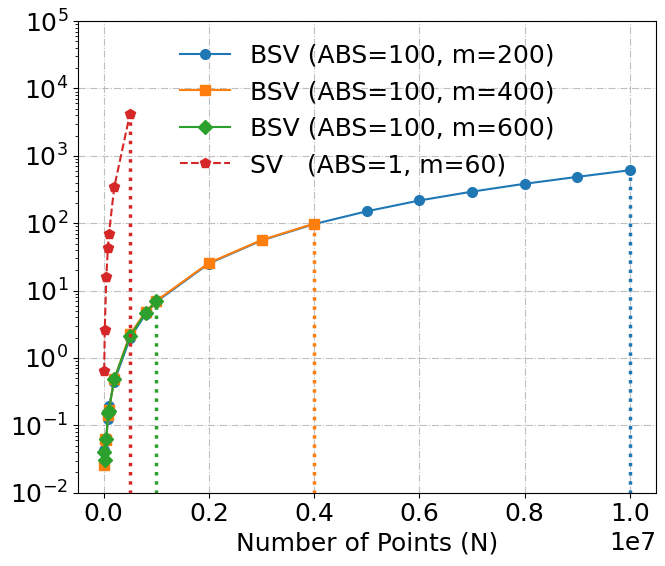

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_bsv = [10000, 20000, 50000, 80000, 100000, 200000, 500000, 800000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 12000000, 14000000, 16000000]
N_sc = [10000, 20000, 50000, 80000, 100000, 200000, 500000]

N_bs=[100]
M_ests=[200, 400, 600]
m_sc = [60]

seeds = [0, 1, 2, 3, 4]

time_bsv = []
time_sc = []

for N_b in N_bs:
    time_bsv_N_b = []
    for M_est in M_ests:
        time_bsv_m = []
        for N in N_bsv:
            time_bsv_m_seed = []
            for seed in seeds:
                try:
                    df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_single.csv')
                    time_bsv_m_seed.append(df['total'].iloc[0] - df['cleanup_gpu'].iloc[0] - df['computation'].iloc[0] - df['gpu_copy'].iloc[0])
                except FileNotFoundError:
                    continue
            if len(time_bsv_m_seed) == 0 or np.isnan(np.mean(time_bsv_m_seed)):
                continue
            time_bsv_m.append(np.mean(time_bsv_m_seed))
        time_bsv_N_b.append(time_bsv_m) # list of lists
    time_bsv.append(time_bsv_N_b) # list of lists of lists

for N in N_sc:
    time_sc_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksTotal{N}_m60_seed{seed}_isScaled0_A100_single.csv')
            time_sc_seed.append(df['total'].iloc[0] - df['cleanup_gpu'].iloc[0] - df['computation'].iloc[0] - df['gpu_copy'].iloc[0])
        except FileNotFoundError:
            continue
    time_sc.append(np.mean(time_sc_seed))
    
import matplotlib.pyplot as plt
import os

# Set default font size to 16
plt.rcParams.update({'font.size': 18})


plt.figure(figsize=(7, 6))
# Define different markers for each line
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']


# Plot BSV lines for different m values
for i, N_b in enumerate(N_bs):
    for j, M_est in enumerate(M_ests):
        line = plt.plot(N_bsv[:len(time_bsv[i][j])], time_bsv[i][j], 
                       label=f'BSV (ABS={N_b}, m={M_est})', 
                       marker=markers[i*len(M_ests)+j],
                       markersize=7)
        
        # Add vertical line from x-axis to last point using same color as the line
        if len(time_bsv[i][j]) > 0:
            last_x = N_bsv[len(time_bsv[i][j])-1]
            last_y = time_bsv[i][j][-1]
            plt.vlines(x=last_x, ymin=plt.ylim()[0], ymax=last_y, 
                      colors=line[0].get_color(), linestyles=':',
                      linewidth=2.5, alpha=1.0)

# Plot SC line
line = plt.plot(N_sc, time_sc, 
         label='SV   (ABS=1, m=60)', 
         marker=markers[7], 
         linestyle='--',
         markersize=7)

plt.vlines(x=N_sc[-1], ymin=plt.ylim()[0], ymax=time_sc[-1], 
                      colors=line[0].get_color(), linestyles=':',
                      linewidth=2.5, alpha=1.0)

plt.xlabel('Number of Points (N)')
# plt.ylabel('CPU Execution Time (seconds)')
# plt.title('Performance Comparison: BSV vs SV')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0, loc='upper center')
plt.ylim(1e-2, 1e5)
# plt.xscale('log')  # Use log scale for x-axis due to large range
plt.yscale('log')  # Use log scale for y-axis if times vary by orders of magnitude
plt.tight_layout()
os.makedirs('./fig', exist_ok=True)
plt.savefig('./fig/perf_CPU_bsv_vs_sv.pdf')
plt.show()

## Strong Scaling

/home/panq/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/panq/.local/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/panq/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/panq/.local/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/panq/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/panq/.local/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / 

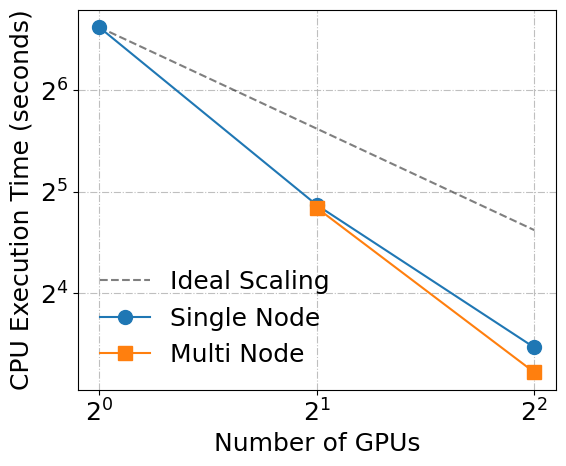

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_bsv = [10000, 20000, 50000, 80000, 100000, 200000, 500000, 800000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 12000000, 14000000, 16000000]

N_b=(100)
M_est=(400)

seeds = [0, 1, 2, 3, 4]

time_bsv_single1 = []
time_bsv_single2 = []
time_bsv_single4 = []
time_bsv_multi2 = []
time_bsv_multi4 = []

for N in N_bsv:
    # single 1
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_single.csv')
            time_bsv_m_seed.append(df['total'].iloc[0] - df['cleanup_gpu'].iloc[0] - df['computation'].iloc[0] - df['gpu_copy'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_single1.append(np.mean(time_bsv_m_seed))
    
    # single 2
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_single2/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_single2.csv')
            time_bsv_m_seed.append(df['total'].iloc[0] - df['cleanup_gpu'].iloc[0] - df['computation'].iloc[0] - df['gpu_copy'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_single2.append(np.mean(time_bsv_m_seed))

    # single 4
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_single4/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_single4.csv')
            time_bsv_m_seed.append(df['total'].iloc[0] - df['cleanup_gpu'].iloc[0] - df['computation'].iloc[0] - df['gpu_copy'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_single4.append(np.mean(time_bsv_m_seed))
    
    # multi 2
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_multi2/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_multi2.csv')
            time_bsv_m_seed.append(df['total'].iloc[0] - df['cleanup_gpu'].iloc[0] - df['computation'].iloc[0] - df['gpu_copy'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_multi2.append(np.mean(time_bsv_m_seed))

    # multi 4
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_multi4/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_multi4.csv')
            time_bsv_m_seed.append(df['total'].iloc[0] - df['cleanup_gpu'].iloc[0] - df['computation'].iloc[0] - df['gpu_copy'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_multi4.append(np.mean(time_bsv_m_seed))

import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Find the largest N that single GPU completed
length = len(time_bsv_single1)
N = N_bsv[length-1]  # This is our fixed problem size

# Get times for this specific N from each configuration
times = []
configs = []

# Only include points where we have data for this N
if length > 0:
    times.append(time_bsv_single1[-1])
    configs.append(1)
if len(time_bsv_single2) >= length:
    times.append(time_bsv_single2[length-1])
    configs.append(2)
if len(time_bsv_single4) >= length:
    times.append(time_bsv_single4[length-1])
    configs.append(3)
if len(time_bsv_multi2) >= length:
    times.append(time_bsv_multi2[length-1])
    configs.append(2)
if len(time_bsv_multi4) >= length:
    times.append(time_bsv_multi4[length-1])
    configs.append(3)

# Split data into single node and multi node
single_node_times = times[:3]
single_node_configs = configs[:3]
multi_node_times = times[3:]
multi_node_configs = configs[3:]

# Create ideal scaling line
base_time = times[0]  # time for 1 GPU
x_ideal = [1, 2, 3]  # Using list instead of np.array for equal spacing
y_ideal = [base_time / 2**i for i, _ in enumerate(x_ideal)]

# Plot
plt.plot(x_ideal, y_ideal, 'k--', label='Ideal Scaling', alpha=0.5)
plt.plot(single_node_configs, single_node_times, 'o-', 
         label='Single Node', markersize=10)
plt.plot(multi_node_configs, multi_node_times, 's-', 
         label='Multi Node', markersize=10)

plt.xlabel('Number of GPUs')
plt.ylabel('CPU Execution Time (seconds)')
# plt.title(f'Strong Scaling: BSV (N={N/1000000:.2f}M, ABS=100, m=400)')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)

# Set x-axis ticks with equal spacing
plt.xticks([1, 2, 3], ['$2^0$', '$2^1$', '$2^2$'])

# Set y-axis to log scale with detailed values
plt.yscale('log', base=2)
# plt.ylim(min(min(times), min(y_ideal))*0.8, max(max(times), max(y_ideal))*1.2)

plt.tight_layout()
plt.savefig('./fig/perf_CPU_strong_scaling.pdf')
plt.show()

## Weak Scaling

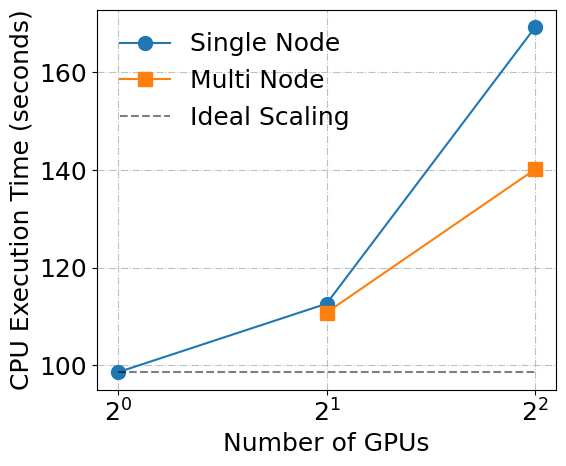

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Get the largest N and corresponding time for each configuration
times = []
configs = []
N_values = []

# Single GPU
if len(time_bsv_single1) > 0:
    times.append(time_bsv_single1[-1])
    configs.append(1)
    N_values.append(N_bsv[len(time_bsv_single1)-1])

# Single node, 2 GPUs
if len(time_bsv_single2) > 0:
    times.append(time_bsv_single2[-1])
    configs.append(2)
    N_values.append(N_bsv[len(time_bsv_single2)-1])

# Single node, 4 GPUs
if len(time_bsv_single4) > 0:
    times.append(time_bsv_single4[-1])
    configs.append(4)
    N_values.append(N_bsv[len(time_bsv_single4)-1])

# Multi node, 2 GPUs
if len(time_bsv_multi2) > 0:
    times.append(time_bsv_multi2[-1])
    configs.append(2)
    N_values.append(N_bsv[len(time_bsv_multi2)-1])

# Multi node, 4 GPUs
if len(time_bsv_multi4) > 0:
    times.append(time_bsv_multi4[-1])
    configs.append(4)
    N_values.append(N_bsv[len(time_bsv_multi4)-1])

# Split data into single node and multi node
single_node_times = times[:3]
single_node_configs = configs[:3]
single_node_N = N_values[:3]
multi_node_times = times[3:]
multi_node_configs = configs[3:]
multi_node_N = N_values[3:]

# Plot
plt.plot(np.arange(len(single_node_configs)), single_node_times, 'o-', 
         label='Single Node', markersize=10)
plt.plot(np.arange(len(multi_node_configs)) + 1, multi_node_times, 's-', 
         label='Multi Node', markersize=10)
# plot ideal scaling
plt.plot(np.arange(len(single_node_configs)), np.repeat(single_node_times[0], len(single_node_configs)), 'k--', label='Ideal Scaling', alpha=0.5)

plt.xlabel('Number of GPUs')
plt.ylabel('CPU Execution Time (seconds)')
# plt.ylim(1.5, 3)
# plt.title('Weak Scaling: BSV (ABS=100, m=400)')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)

# Set x-axis ticks with equal spacing
plt.xticks(np.arange(len(single_node_configs)), ['$2^0$', '$2^1$', '$2^2$'])

# plt.yscale('log', base=2)
plt.tight_layout()
plt.savefig('./fig/perf_CPU_weak_scaling.pdf')
plt.show()

## Multi & Single Comparison CPU

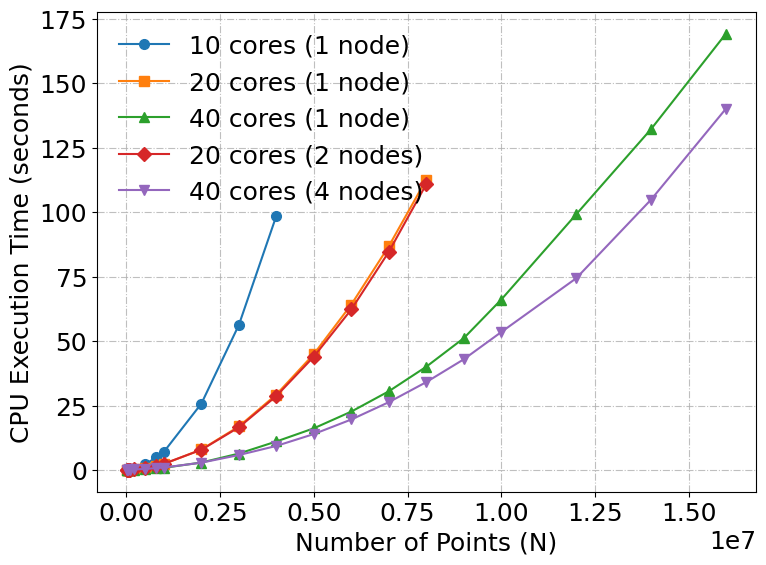

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(7, 6))

# Plot all configurations
plt.plot(N_bsv[:len(time_bsv_single1)], time_bsv_single1, 'o-', 
         label='10 cores (1 node)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_single2)], time_bsv_single2, 's-', 
         label='20 cores (1 node)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_single4)], time_bsv_single4, '^-', 
         label='40 cores (1 node)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_multi2)], time_bsv_multi2, 'D-', 
         label='20 cores (2 nodes)', markersize=7)
plt.plot(N_bsv[:len(time_bsv_multi4)], time_bsv_multi4, 'v-', 
         label='40 cores (4 nodes)', markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('CPU Execution Time (seconds)')
plt.grid(True, ls="-.", alpha=0.8)
plt.legend(framealpha=0.0)
# plt.xscale('log')  # Use log scale for x-axis due to large range
# plt.yscale('log')  # Use log scale for y-axis

plt.tight_layout()
plt.savefig('./fig/perf_CPU_all_configs.pdf')
plt.show()